# Data pre-processing

In [1]:
## Reading data and splits class column 
import pandas as pd 

dataframe = pd.read_csv('HTRU_2.csv',index_col=None)
x = dataframe.iloc[:,0:8]
y = dataframe.iloc[:,8:]

dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Mean of integradet profile                   17898 non-null  float64
 1   Standard devation of the integrated profile  17898 non-null  float64
 2   Excess kurtosis integraded profile           17898 non-null  float64
 3   Skewness integrated profile                  17898 non-null  float64
 4   Mean of the DM-SNR curve                     17898 non-null  float64
 5   Standard devation DM-SNR curve               17898 non-null  float64
 6   Excess kurtosis of the DM-SRR curve          17898 non-null  float64
 7   Skewness of the DM-SNR curve                 17898 non-null  float64
 8   Class                                        17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [2]:
## Checking is there any NaN value
print(dataframe .isnull().values.any())

False


In [3]:
## Splitting to test and train data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=1)

In [4]:
## Scaling data 
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
x_train = scalar.fit_transform(x_train)
x_test = scalar.transform(x_test)

# Data visualization

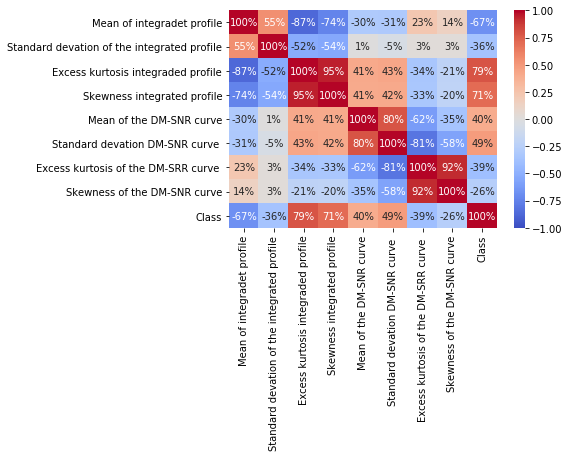

In [5]:
## Creating graph showing the correlation between columns 
import seaborn as sns

corr = dataframe.corr()
heat = sns.heatmap(corr,vmin = -1,cmap="coolwarm", fmt='.0%', annot=True)

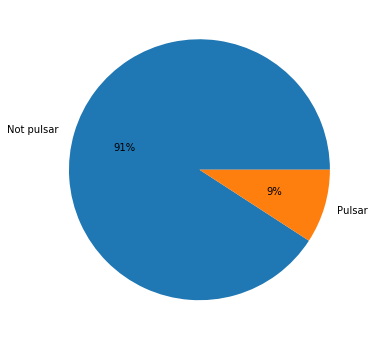

In [6]:
## Creating graph showing how many real pulsars we have in the data 
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.pie(dataframe["Class"].value_counts().values,labels=["Not pulsar ","Pulsar"], autopct="%1.0f%%")
plt.show()

# Algorithms results

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score ,f1_score
import statistics

## Creating function which give us result for algorithm
def check_algorithm(algorithm,param_grid):
    ## Using GridSearchCV with cross validation to model fitting
    grid = GridSearchCV(algorithm, param_grid, cv = 5)
    grid.fit(x_train, y_train.values.ravel())
    
    ## Checking cross validation results
    cv_test_score = grid.cv_results_['mean_test_score']
    cv_test_std = grid.cv_results_['std_test_score']
    cv_score_mean = statistics.mean(cv_test_score)
    cv_score_std = statistics.mean(cv_test_std)
    
    ## Model prediction and checking results
    y_prediction = grid.predict(x_test)
    acc_score = accuracy_score(y_test,y_prediction)
    f1score = f1_score(y_test, y_prediction)

    ## Printing results
    print('Average cross-validation score : ' + str(cv_score_mean))
    print('Cross-validation standard deviation score  : ' + str(cv_score_std ))
    print('Accuracy score of the best model : ' + str(acc_score))
    print('F1 result of the best model : ' + str(f1score))
    print("The best hyperparameters are " + str(grid.best_params_))
    

In [8]:
from sklearn.tree import DecisionTreeClassifier

## Creating decision tree algorithm
tree = DecisionTreeClassifier()


parameters = {'max_depth' : (1,2,3,),
            'criterion' : ('gini','entropy' )
}

## Using function to shows results
check_algorithm(tree,parameters)

Average cross-validation score : 0.9765450549084581
Cross-validation standard deviation score  : 0.002325306902057978
Accuracy score of the best model : 0.9792178770949721
F1 result of the best model : 0.88
The best hyperparameters are {'criterion': 'entropy', 'max_depth': 3}


In [9]:
from sklearn.ensemble import BaggingClassifier

## Creating bagging algorithm with decision tree
tree = DecisionTreeClassifier(criterion="entropy", max_depth = 3)
bagging = BaggingClassifier(base_estimator= tree)

bagging_param={
    'n_estimators' : (100,200,300), 
}

check_algorithm(bagging,bagging_param)

Average cross-validation score : 0.9782461116337845
Cross-validation standard deviation score  : 0.002452546624717405
Accuracy score of the best model : 0.9798882681564246
F1 result of the best model : 0.8831168831168831
The best hyperparameters are {'n_estimators': 300}


In [10]:
from sklearn.ensemble import RandomForestClassifier

## Creating random forest algorithm 
forest_cls = RandomForestClassifier()

forest_param = {
            'n_estimators' : (100,200,300),
            'max_depth' : (2,3),
            'criterion' : ('gini','entropy'),         
}

check_algorithm(forest_cls,forest_param)

Average cross-validation score : 0.9755269380312883
Cross-validation standard deviation score  : 0.0022128661038460715
Accuracy score of the best model : 0.9783240223463687
F1 result of the best model : 0.8722002635046112
The best hyperparameters are {'criterion': 'entropy', 'max_depth': 3, 'n_estimators': 100}


In [11]:
from sklearn import svm

## Creating svm algorithm 
svm_cls = svm.SVC()  

svm_param = {
    'kernel' : ('linear', 'rbf'),
    "gamma": ('scale', 'auto')
}

check_algorithm(svm_cls,svm_param)

Average cross-validation score : 0.9779853161156393
Cross-validation standard deviation score  : 0.0027753004902654373
Accuracy score of the best model : 0.9814525139664805
F1 result of the best model : 0.8915032679738563
The best hyperparameters are {'gamma': 'scale', 'kernel': 'linear'}


In [12]:
from sklearn.neighbors import KNeighborsClassifier

## Creating k-nearest neighbors algorithm
neigh = KNeighborsClassifier()

neigh_param = {
    'n_neighbors': ( 2,3,4,5,6,7) 
}

check_algorithm(neigh,neigh_param)

Average cross-validation score : 0.977314975933897
Cross-validation standard deviation score  : 0.002290567967995086
Accuracy score of the best model : 0.9803351955307262
F1 result of the best model : 0.8848167539267016
The best hyperparameters are {'n_neighbors': 7}
